## Q1

H0 - Null Hypothesis : u1 = u2 = u3 = .... = uk (it emplies that mean of all the population are equal)
H1 - Alternate Hypothesis : (it emplies that mean of all the population are equal Not Equal)

In [3]:
from scipy.stats import f_oneway
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws 
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('data_date.csv')
df.head(10)

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
5,2022-07-21,Armenia,Moderate,76
6,2022-07-21,Australia,Moderate,56
7,2022-07-21,Austria,Good,45
8,2022-07-21,Azerbaijan,Good,12
9,2022-07-21,Bahrain,Unhealthy,165


In [3]:
Q1_df = df.drop(['Country','Status'],axis=1)
Q1_df

,Date,AQI Value
0,2022-07-21,14
1,2022-07-21,65
2,2022-07-21,55
3,2022-07-21,113
4,2022-07-21,63
...,...,...
11095,2023-05-11,57
11096,2023-05-11,50
11097,2023-05-11,17
11098,2023-05-11,94


In [4]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       11100 non-null  object
 1   AQI Value  11100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.6+ KB


In [5]:
Q1_df['Date'] = pd.to_datetime(Q1_df['Date'])

In [6]:
Q1_df = Q1_df[(Q1_df['Date'].dt.month == 7)  | (Q1_df['Date'].dt.month == 8)]
Q1_df

,Date,AQI Value
0,2022-07-21,14
1,2022-07-21,65
2,2022-07-21,55
3,2022-07-21,113
4,2022-07-21,63
...,...,...
6763,2022-08-31,99
6764,2022-08-31,42
6765,2022-08-31,17
6766,2022-08-31,107


In [7]:
result = df.groupby('Country')['AQI Value'].apply(list)
print(result)

Country
Albania       [14, 17, 15, 15, 20, 15, 20, 18, 55, 42, 44, 4...
Algeria       [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...
Andorra       [55, 51, 52, 51, 37, 33, 45, 41, 16, 21, 31, 2...
Angola        [113, 152, 110, 134, 126, 105, 109, 107, 117, ...
Argentina     [63, 61, 53, 61, 58, 49, 62, 42, 74, 35, 43, 3...
                                    ...                        
Uzbekistan    [60, 58, 98, 56, 116, 62, 92, 73, 57, 38, 75, ...
Vatican       [70, 70, 61, 61, 68, 68, 68, 57, 61, 53, 53, 6...
Venezuela     [3, 2, 20, 8, 11, 20, 20, 4, 5, 14, 18, 31, 21...
Vietnam       [43, 41, 76, 61, 119, 87, 119, 92, 84, 60, 88,...
Zambia        [39, 54, 36, 66, 100, 78, 82, 152, 89, 56, 73,...
Name: AQI Value, Length: 142, dtype: object


In [8]:
# Run Anova 
F,p = f_oneway(*result)
print(F)
print(p)

130.8391073194441
0.0


In [9]:
# Conclusion p = 0 since the p values is less than 0.05 hence we would reject the H0.
print("Since p values is M 0.05 ,we reject the null hypothesis , so there's differnece between the mean AQI values of different countries")

Since p values is M 0.05 ,we reject the null hypothesis , so there's differnece between the mean AQI values of different countries


In [10]:

plt.figure(figsize=(30,6))
plt.bar(mean.index.tolist(),mean.values.tolist())
plt.xticks(rotation=90)
plt.title('HISTOGRAM COUNTRY V/S AQI Values',color='hotpink')
plt.xlabel('Country -->',color='navy')
plt.ylabel('AQI Values -->',color='navy')
plt.show()

NameError: name 'mean' is not defined

<Figure size 3000x600 with 0 Axes>

* H0 - Null Hypothesis : u1 = u2 = u3 = .... = uk (it emplies that mean of all the population are equal)
* H1 - Alternate Hypothesis : (it emplies that mean of all the population are equal Not Equal)

In [1]:
from scipy.stats import f_oneway
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws 
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('data_date.csv')
df.head(10)

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
5,2022-07-21,Armenia,Moderate,76
6,2022-07-21,Australia,Moderate,56
7,2022-07-21,Austria,Good,45
8,2022-07-21,Azerbaijan,Good,12
9,2022-07-21,Bahrain,Unhealthy,165


In [3]:
new_df = df[['Date','Country']]
new_df

,Date,Country
0,2022-07-21,Albania
1,2022-07-21,Algeria
2,2022-07-21,Andorra
3,2022-07-21,Angola
4,2022-07-21,Argentina
...,...,...
11095,2023-05-11,Uzbekistan
11096,2023-05-11,Vatican
11097,2023-05-11,Venezuela
11098,2023-05-11,Vietnam


In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     11100 non-null  object
 1   Country  11100 non-null  object
dtypes: object(2)
memory usage: 173.6+ KB


In [5]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     11100 non-null  datetime64[ns]
 1   Country  11100 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 173.6+ KB


/tmp/ipykernel_16065/2126293450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = pd.to_datetime(new_df['Date'])


In [6]:
cond = (new_df['Date'].dt.month == 7) | (new_df['Date'].dt.month == 8)
cond

0         True
1         True
2         True
3         True
4         True
         ...  
11095    False
11096    False
11097    False
11098    False
11099    False
Name: Date, Length: 11100, dtype: bool

In [7]:
new_df = new_df[cond]
new_df

,Date,Country
0,2022-07-21,Albania
1,2022-07-21,Algeria
2,2022-07-21,Andorra
3,2022-07-21,Angola
4,2022-07-21,Argentina
...,...,...
6763,2022-08-31,Uzbekistan
6764,2022-08-31,Vatican
6765,2022-08-31,Venezuela
6766,2022-08-31,Vietnam


In [8]:
new_df.groupby('Country').count()

,Date
Country,
Albania,48
Algeria,48
Andorra,48
Angola,48
Argentina,48
...,...
Uzbekistan,48
Vatican,48
Venezuela,48


## Q2

### Q2-A

In [9]:
df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [10]:
new_d1 = df[df['Country'] == 'India']
new_d1

,Date,Country,Status,AQI Value
59,2022-07-21,India,Unhealthy,162
201,2022-07-21,India,Unhealthy,162
343,2022-07-22,India,Very Unhealthy,226
484,2022-07-22,India,Unhealthy,160
625,2022-07-22,India,Unhealthy,153
...,...,...,...,...
10464,2023-04-13,India,Very Unhealthy,231
10604,2023-04-20,India,Very Unhealthy,235
10742,2023-04-27,India,Very Unhealthy,256
10880,2023-05-04,India,Unhealthy,181


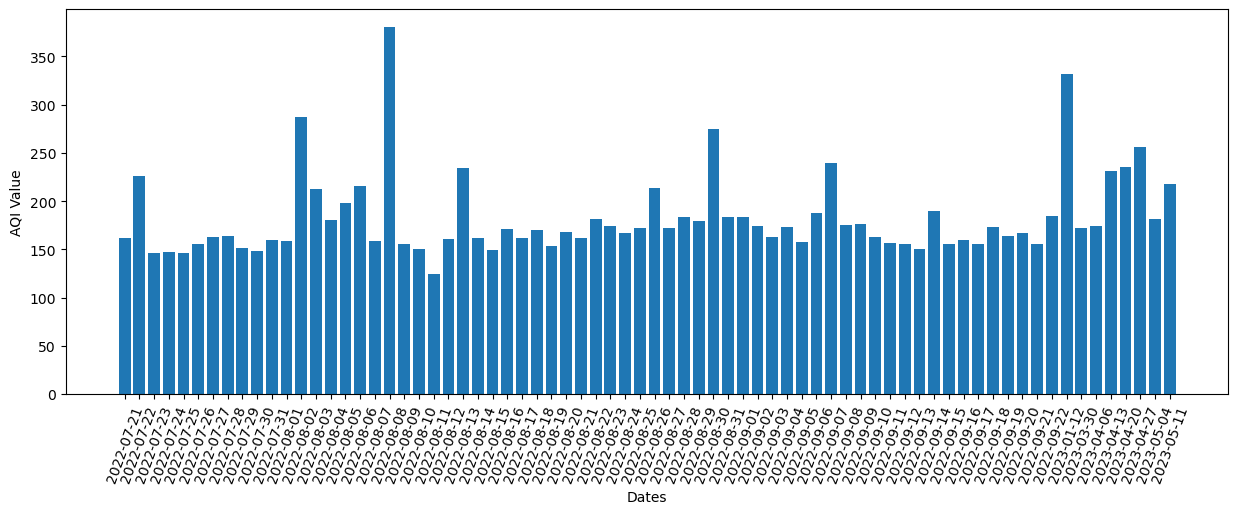

In [11]:
plt.figure(figsize=(15,5))
plt.bar(new_d1['Date'],height=new_d1['AQI Value'])
plt.xlabel('Dates')
plt.ylabel('AQI Value')
plt.xticks(rotation=70);

### Q2-B

In [12]:
new_d1 = df[df['Country'] == 'Cyprus']
new_d1

,Date,Country,Status,AQI Value
32,2022-07-21,Cyprus,Good,50
174,2022-07-21,Cyprus,Moderate,53
316,2022-07-22,Cyprus,Good,50
457,2022-07-22,Cyprus,Good,48
598,2022-07-22,Cyprus,Moderate,53
...,...,...,...,...
10439,2023-04-13,Cyprus,Good,40
10579,2023-04-20,Cyprus,Good,41
10717,2023-04-27,Cyprus,Moderate,53
10856,2023-05-04,Cyprus,Moderate,60


{'whiskers': [<matplotlib.lines.Line2D at 0x7f28bd7b8210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f28bdb67990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f28bdb27550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f28bd7ba150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f28bd7b9f90>],
 'means': []}

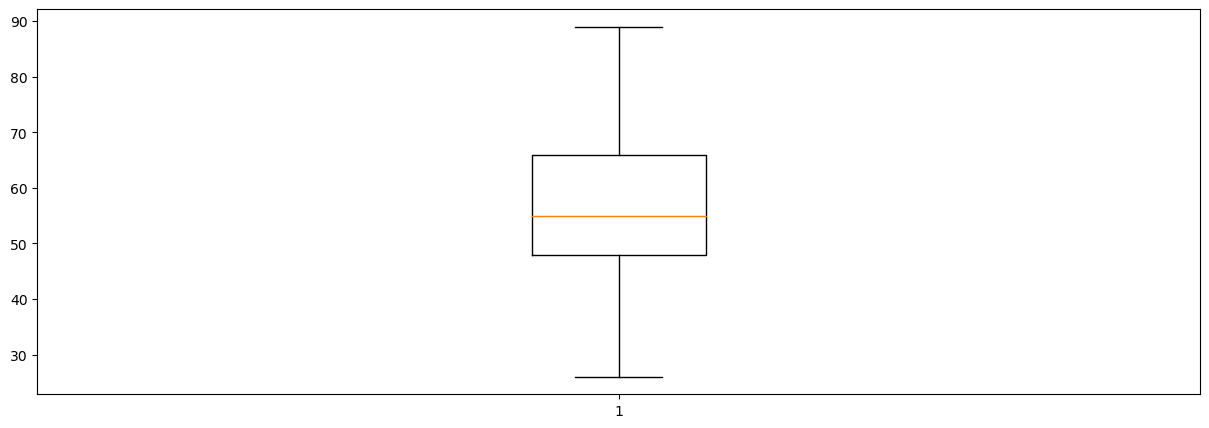

In [13]:
plt.figure(figsize=(15,5))
plt.boxplot(new_d1['AQI Value'])
#plt.xlabel('Dates')
#plt.ylabel('AQI Value')
#plt.xticks(rotation=70);

<Axes: xlabel='AQI Value', ylabel='Country'>

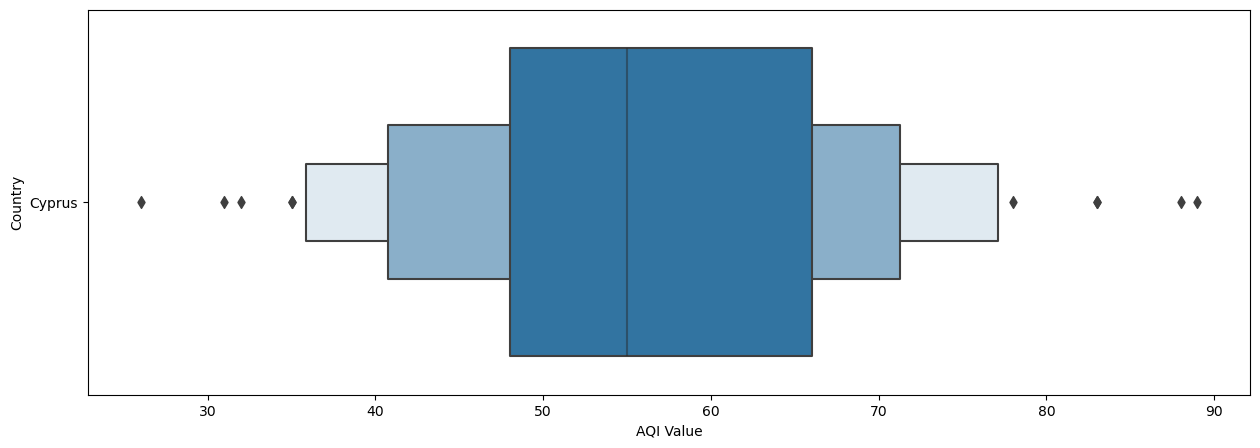

In [14]:
plt.figure(figsize=(15,5))
sns.boxenplot(data=new_d1,y='Country',x='AQI Value')

### Q2-C

In [15]:
new_d1 = df[df['Country'] == 'United Kingdom of Great Britain and Northern Ireland']
new_d1

,Date,Country,Status,AQI Value
135,2022-07-21,United Kingdom of Great Britain and Northern I...,Moderate,55
277,2022-07-21,United Kingdom of Great Britain and Northern I...,Moderate,55
418,2022-07-22,United Kingdom of Great Britain and Northern I...,Good,49
559,2022-07-22,United Kingdom of Great Britain and Northern I...,Good,47
700,2022-07-22,United Kingdom of Great Britain and Northern I...,Good,43
...,...,...,...,...
10540,2023-04-13,United Kingdom of Great Britain and Northern I...,Good,44
10680,2023-04-20,United Kingdom of Great Britain and Northern I...,Moderate,63
10818,2023-04-27,United Kingdom of Great Britain and Northern I...,Moderate,75
10956,2023-05-04,United Kingdom of Great Britain and Northern I...,Moderate,75


{'whiskers': [<matplotlib.lines.Line2D at 0x7f28bdacad50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f28bd8e4310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f28bdaca050>],
 'medians': [<matplotlib.lines.Line2D at 0x7f28bd8e59d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f28bd7e63d0>],
 'means': []}

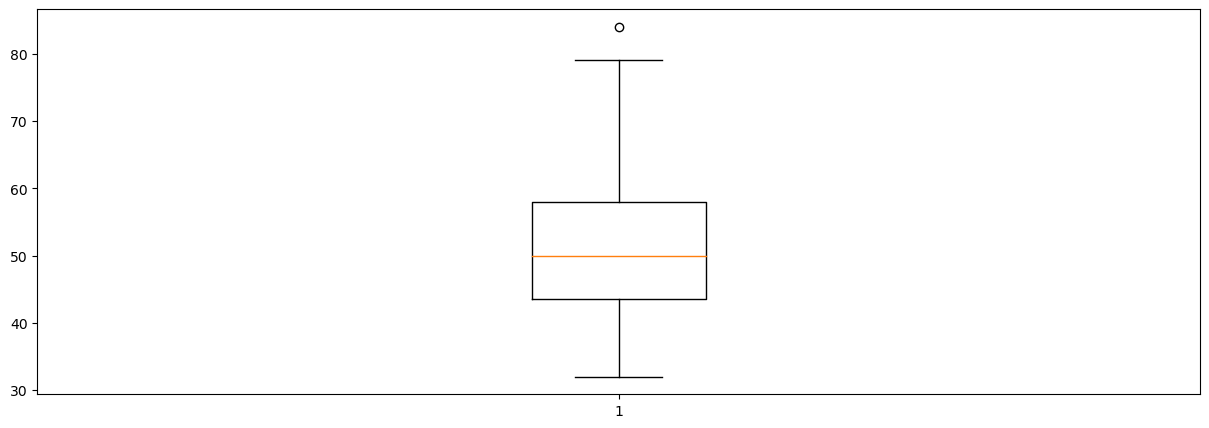

In [17]:
plt.figure(figsize=(15,5))
plt.boxplot(new_d1['AQI Value'])

<Axes: xlabel='AQI Value', ylabel='Country'>

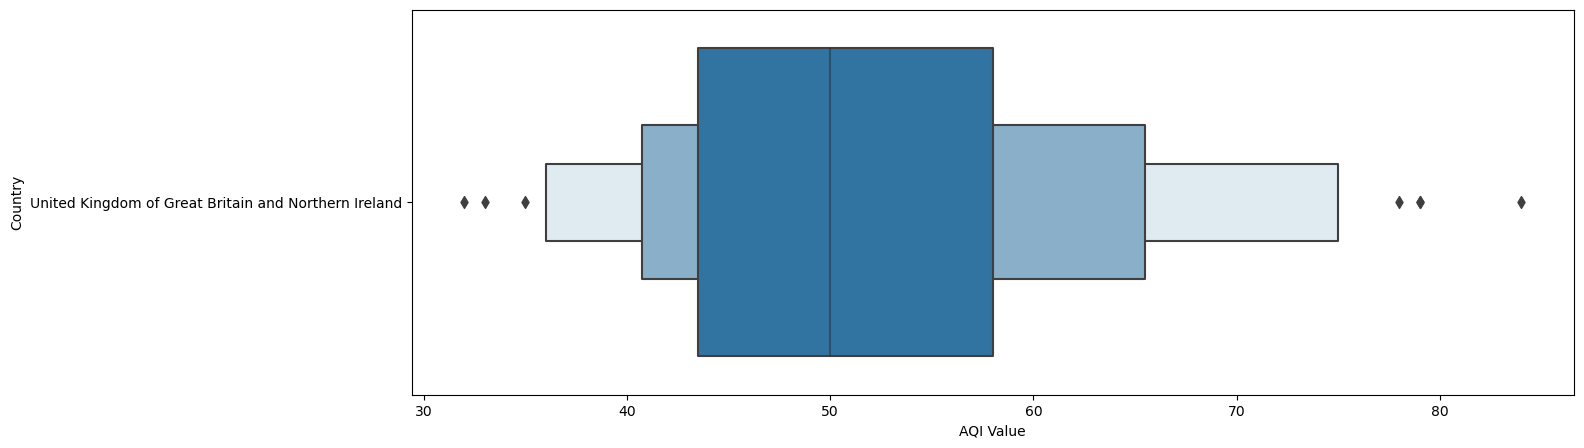

In [18]:
plt.figure(figsize=(15,5))
sns.boxenplot(data=new_d1,y='Country',x='AQI Value')

### Q2-D

In [26]:
India_x =  df[df['Country'] == 'India']
Nepal_y =  df[df['Country'] == 'Nepal']

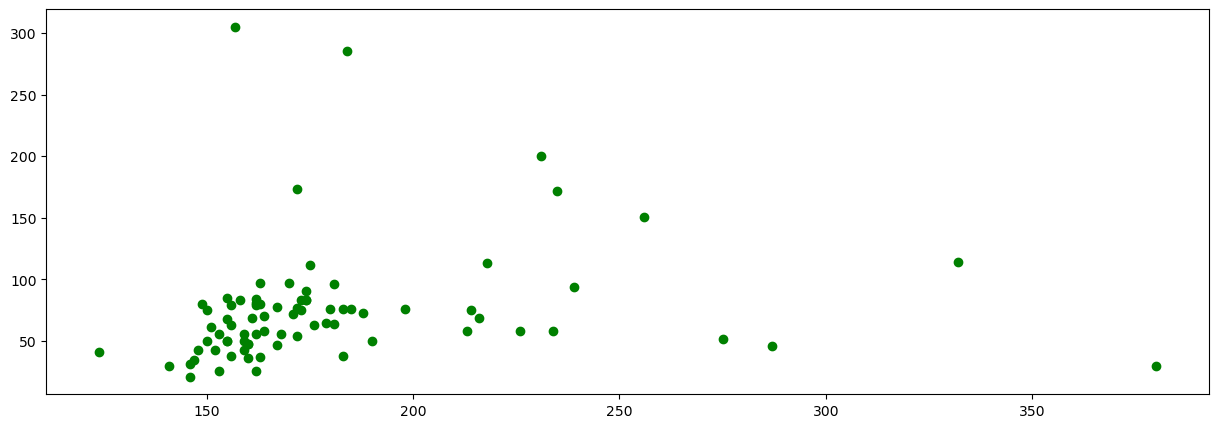

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(x=India_x['AQI Value'],y=Nepal_y['AQI Value'],color='Green')

In [29]:
hmap = pd.DataFrame({'Ind_AQI':India_x['AQI Value'],'Nep_AQI':Nepal_y['AQI Value']})
hmap

,Ind_AQI,Nep_AQI
59,162.0,NaN
94,NaN,81.0
201,162.0,NaN
236,NaN,79.0
343,226.0,NaN
...,...,...
10777,NaN,151.0
10880,181.0,NaN
10915,NaN,96.0
11017,218.0,NaN


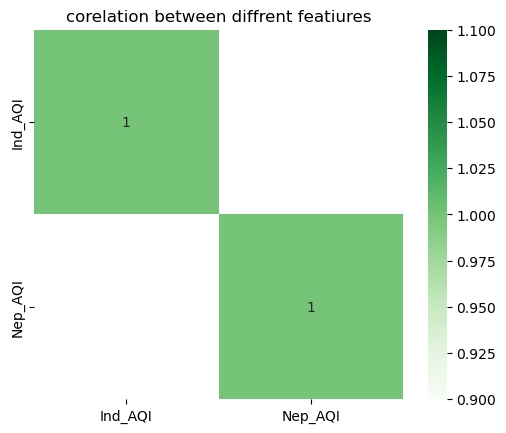

In [30]:
import seaborn as sns 
correlation = hmap.corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='Greens',annot=True)
plt.title('corelation between diffrent featiures')
plt.show()

In [32]:
import pylab 
import scipy.stats as stats

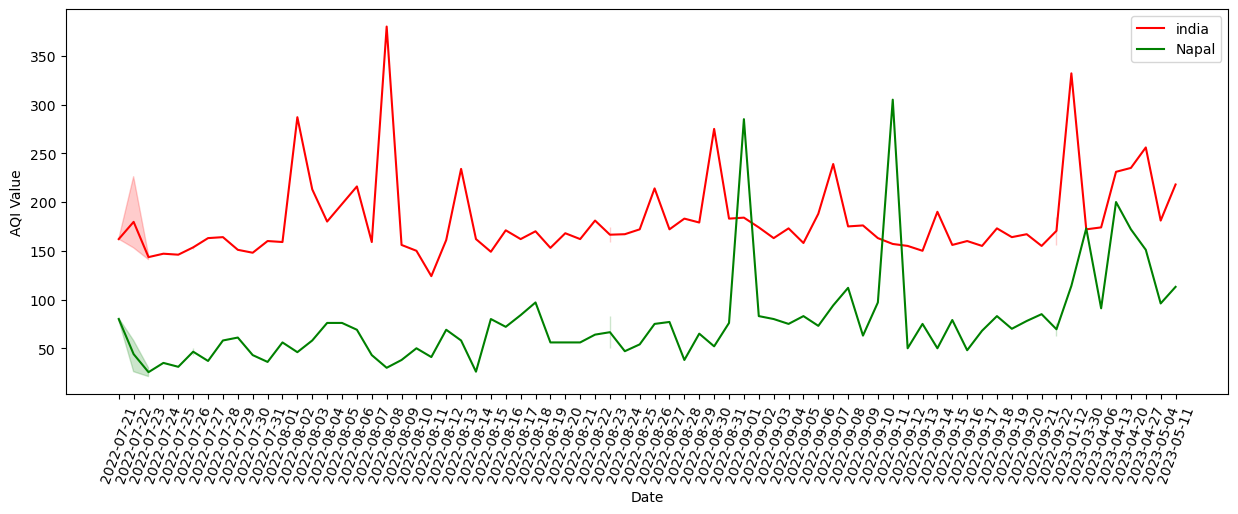

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(data=India_x,x = India_x['Date'],y=India_x['AQI Value'],color = 'red',label = "india")
sns.lineplot(data=Nepal_y,x = Nepal_y['Date'],y=Nepal_y['AQI Value'],color = 'green',label = 'Napal')
plt.xticks(rotation = 70);

### Q2-E

In [34]:
US_x =  df[df['Country'] == 'United States of America']
US_x

,Date,Country,Status,AQI Value
136,2022-07-21,United States of America,Unhealthy for Sensitive Groups,116
278,2022-07-21,United States of America,Unhealthy for Sensitive Groups,107
419,2022-07-22,United States of America,Moderate,89
560,2022-07-22,United States of America,Moderate,89
701,2022-07-22,United States of America,Moderate,91
...,...,...,...,...
10541,2023-04-13,United States of America,Unhealthy for Sensitive Groups,123
10681,2023-04-20,United States of America,Moderate,98
10819,2023-04-27,United States of America,Moderate,100
10957,2023-05-04,United States of America,Moderate,85


In [35]:
Canada_y =  df[df['Country'] == 'Canada']

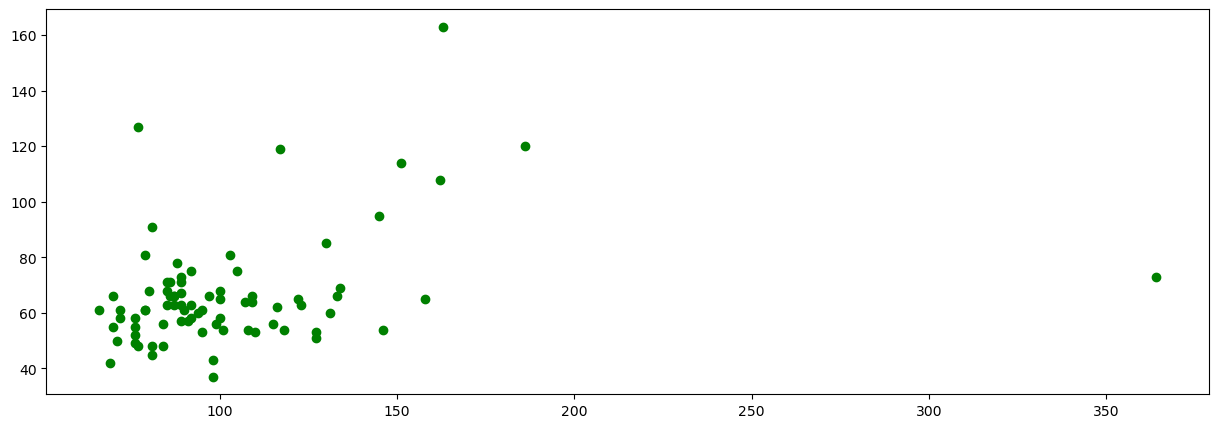

In [36]:
plt.figure(figsize=(15,5))
plt.scatter(x=US_x['AQI Value'],y=Canada_y['AQI Value'],color='Green')

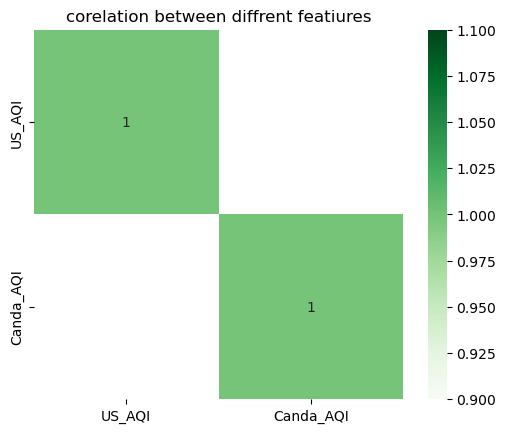

In [37]:
hmap = pd.DataFrame({'US_AQI':US_x['AQI Value'],'Canda_AQI':Canada_y['AQI Value']})
hmap
import seaborn as sns 
correlation = hmap.corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='Greens',annot=True)
plt.title('corelation between diffrent featiures')
plt.show()

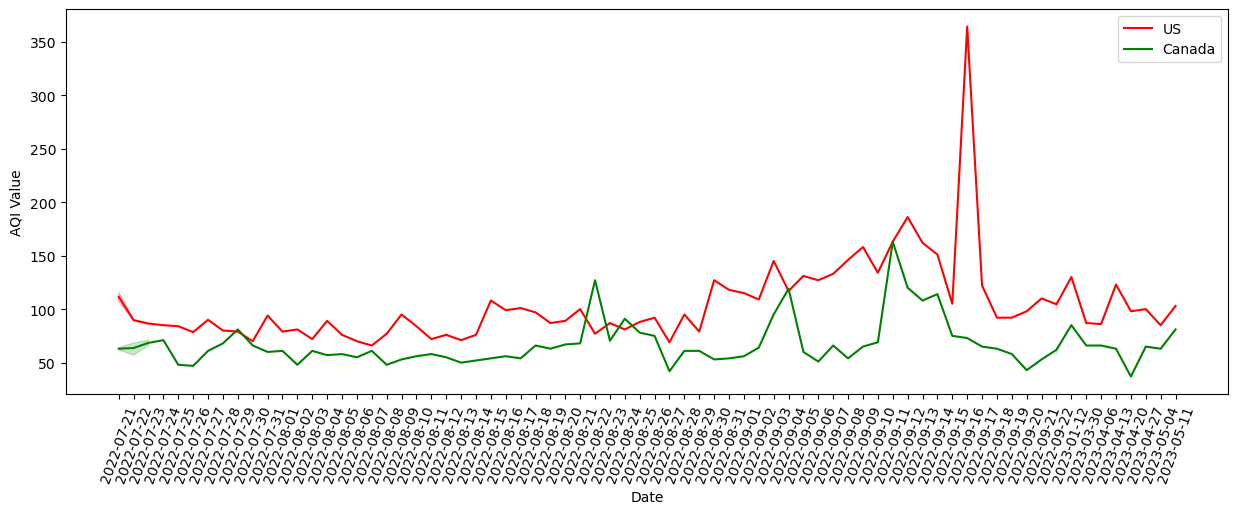

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(data=US_x,x = US_x['Date'],y=US_x['AQI Value'],color = 'red',label = "US")
sns.lineplot(data=Canada_y,x = Canada_y['Date'],y=Canada_y['AQI Value'],color = 'green',label = 'Canada')
plt.xticks(rotation = 70);

## Q3

In [18]:
df = pd.read_csv('data_date.csv')

In [23]:
Aus =  df[df['Country'] == 'India']
Aus.drop(columns=['Country','Status'],inplace=True)
Aus = Aus.drop_duplicates('Date')
Aus

/tmp/ipykernel_16372/4245330600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aus.drop(columns=['Country','Status'],inplace=True)


,Date,AQI Value
59,2022-07-21,162
343,2022-07-22,226
766,2022-07-23,141
1048,2022-07-24,147
1189,2022-07-25,146
...,...,...
10464,2023-04-13,231
10604,2023-04-20,235
10742,2023-04-27,256
10880,2023-05-04,181


In [24]:
Aus['Date'] = pd.to_datetime(Aus['Date'])
Aus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 59 to 11017
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       72 non-null     datetime64[ns]
 1   AQI Value  72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [25]:
Aus.set_index('Date',inplace=True)
Aus

,AQI Value
Date,
2022-07-21,162
2022-07-22,226
2022-07-23,141
2022-07-24,147
2022-07-25,146
...,...
2023-04-13,231
2023-04-20,235
2023-04-27,256


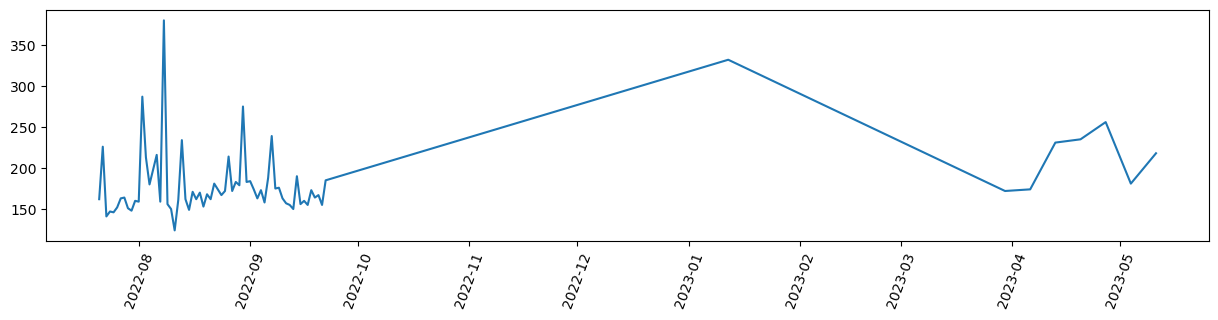

In [26]:
plt.figure(figsize=(15,3))
plt.plot(Aus)
plt.xticks(rotation = 70);

In [28]:
Aus['roll_mean'] = Aus['AQI Value'].rolling(window=10).mean()
Aus['roll_std'] = Aus['AQI Value'].rolling(window=10).std()
Aus.dropna(inplace=True)

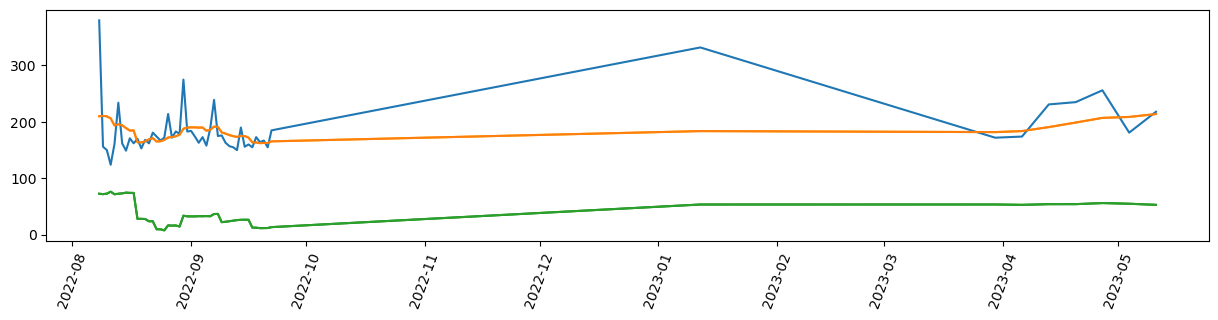

In [29]:
plt.figure(figsize=(15,3))
plt.plot(Aus['roll_mean'],color = 'orange')
plt.plot(Aus['roll_std'], color = 'green')
plt.plot(Aus)
plt.xticks(rotation = 70);

In [30]:
Aus['FirstDiff'] = Aus[['AQI Value']].diff(1)

In [31]:
from statsmodels.tsa.stattools import adfuller

adfuller(Aus['AQI Value'])

(-8.289963152723777,
 4.288119714404413e-13,
 0,
 53,
 {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 423.8188981877755)

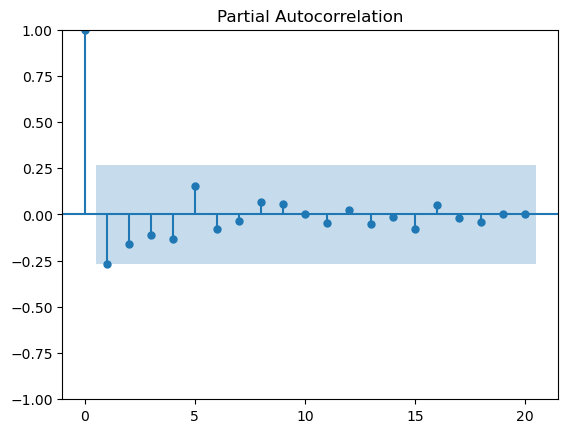

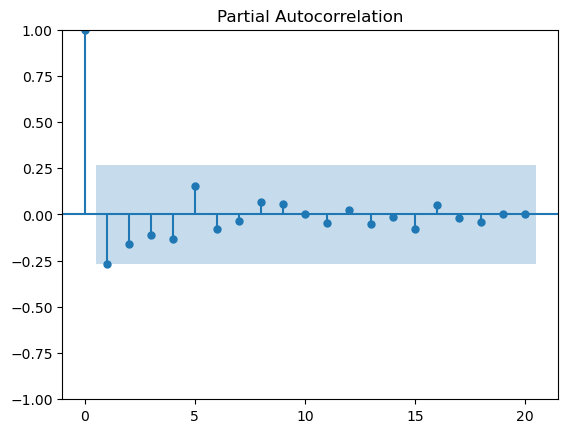

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_pacf(Aus['FirstDiff'].dropna(),lags=20)

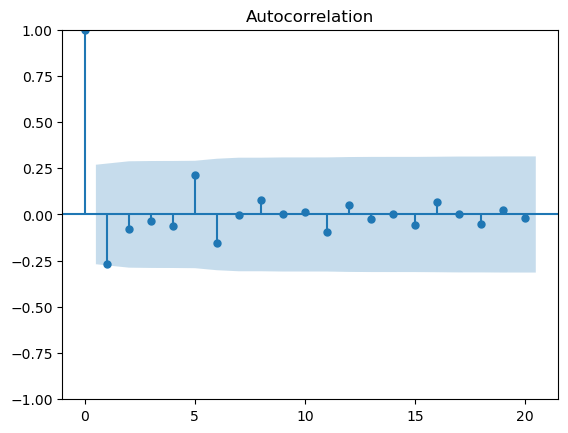

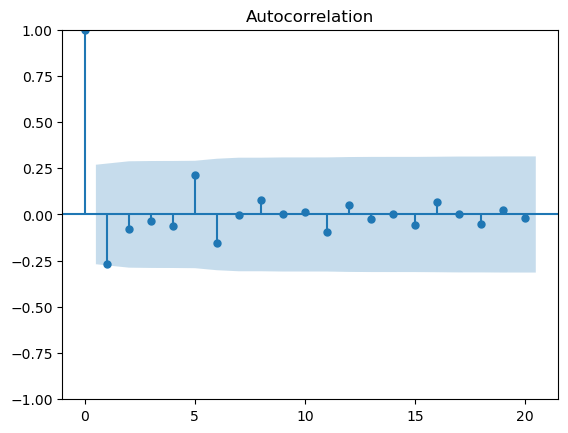

In [33]:
plot_acf(Aus['FirstDiff'].dropna(),lags=20)

In [34]:
train = Aus[:round(len(Aus)*70/100)]
train.tail()

,AQI Value,roll_mean,roll_std,FirstDiff
Date,,,,
2022-09-10,163,179.3,22.959142,-13.0
2022-09-11,157,176.6,23.912805,-6.0
2022-09-12,155,174.7,24.877701,-2.0
2022-09-13,150,173.4,25.876630,-5.0
2022-09-14,190,175.1,26.400547,40.0


In [65]:
test = Aus[round(len(Aus)*70/100):]
test.head()

,AQI Value,roll_mean,roll_std,FirstDiff
Date,,,,
2022-09-11,42,44.1,7.694876,8.0
2022-09-12,44,43.7,7.572611,2.0
2022-09-13,51,42.9,6.045200,7.0
2022-09-14,40,42.4,6.058969,-11.0
2022-09-15,44,42.3,6.019413,4.0


/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge

TypeError: tz must be string or tzinfo subclass.

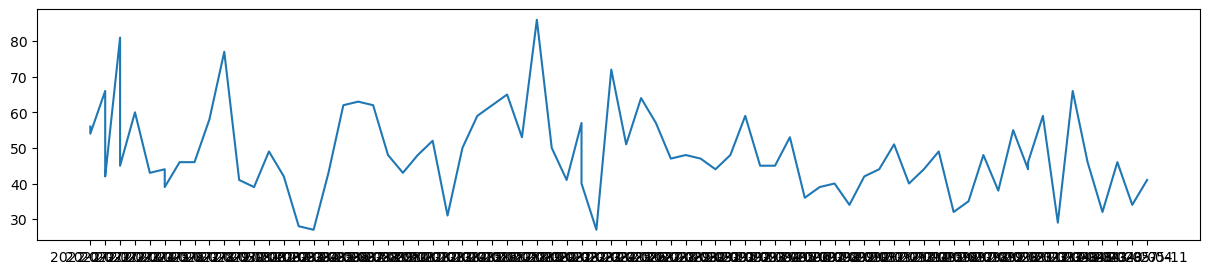

In [66]:
model = ARIMA(train['AQI Value'],order=(1,1,1))
model_fit = model.fit()
forcast_steps = 10
forecast = model_fit.forecast(steps=forcast_steps)

plt.figure(figsize=(15,3))
plt.plot(testAus['AQI Value'])
plt.plot(pd.date_range(start=dAus.index[-1], periods=forcast_steps , freq='D'),forecast,label = 'AQI Value', color = 'red')
plt.xticks(rotation = 70);

In [ ]:
dAus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2022-07-21 to 2023-05-11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    79 non-null     object
 1   Status     79 non-null     object
 2   AQI Value  79 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
